In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
input = cv.imread('input.jpg')
face = cv.imread('face.jpg')
apple = cv.imread('apple.jpg')
orange = cv.imread('orange.jpg')
background = cv.imread('background.png')
balloons = cv.imread('balloons.png')

input = cv.cvtColor(input, cv.COLOR_BGR2RGB)
face = cv.cvtColor(face, cv.COLOR_BGR2RGB)
apple = cv.cvtColor(apple, cv.COLOR_BGR2RGB)
orange = cv.cvtColor(orange, cv.COLOR_BGR2RGB)
background = cv.cvtColor(background, cv.COLOR_BGR2RGB)
balloons = cv.cvtColor(balloons, cv.COLOR_BGR2RGB)


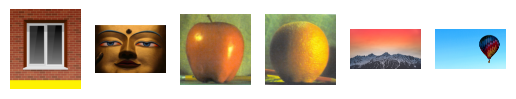

In [ ]:
# plt.imshow(input) # original image
plt.subplot(1, 6, 1)
# plt.title('input.jpg')
plt.imshow(input)
plt.axis('off')

plt.subplot(1, 6, 2)
# plt.title('face.jpg')
plt.imshow(face)
plt.axis('off')

plt.subplot(1, 6, 3)
# plt.title('apple.jpg')
plt.imshow(apple)
plt.axis('off')

plt.subplot(1, 6, 4)
# plt.title('orange.jpg')
plt.imshow(orange)
plt.axis('off')

plt.subplot(1, 6, 5)
# plt.title('background.png')
plt.imshow(background)
plt.axis('off')

plt.subplot(1, 6, 6)
# plt.title('balloons.png')
plt.imshow(balloons)
plt.axis('off')

plt.show()

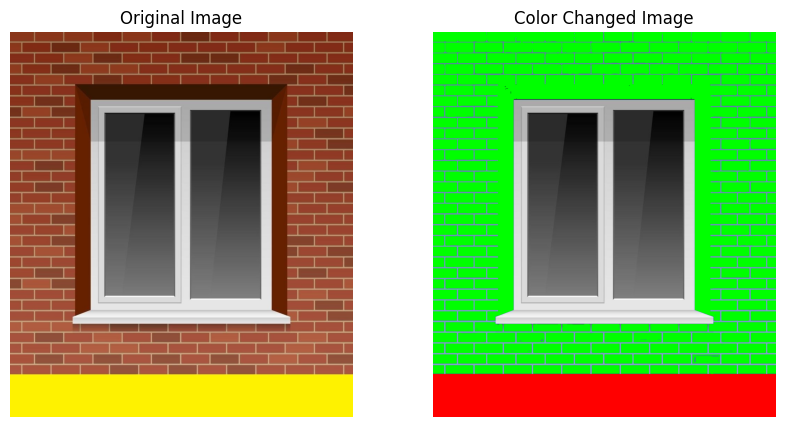

In [ ]:
#apply masks to change the color of certain parts of image
input = cv.imread('input.jpg')
input = cv.cvtColor(input, cv.COLOR_BGR2RGB)

# Convert the image to HSV color space
hsv_image = cv.cvtColor(input, cv.COLOR_BGR2HSV)
lower_red = np.array([107, 125, 50])
upper_red = np.array([120, 255, 180])

red_mask = cv.inRange(hsv_image, lower_red, upper_red)


lower_yellow = np.array([20, 100, 100])
upper_yellow = np.array([100, 255, 255])
yellow_mask = cv.inRange(hsv_image, lower_yellow, upper_yellow)

# Create copies of the original image
result_image = input.copy()

result_image[red_mask > 0] = [0, 255, 0]  # red >> Green
result_image[yellow_mask > 0] = [0, 0, 255]  # yellow >> Red

# Convert images from BGR to RGB for displaying with matplotlib
result_image_rgb = cv.cvtColor(result_image, cv.COLOR_BGR2RGB)

# Display the original and the final images using matplotlib
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(input)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Color Changed Image')
plt.imshow(result_image_rgb)
plt.axis('off')
plt.show()


• Import cv2 as cv and numpy as np
 • Read ”face.jpeg”
 • Change the image to gray scale
 • Use the Sobel function to compute the gradient of the image in x direction, Gx, by
 Calling the cv.Soble() function. Show Gx.
 • Use the Sobel function to compute the gradient of the image in y direction, Gy, by
 Calling the cv.Soble() function. Show Gy.

 • Now that you found out both gradients in x and y direction, you can calculate gradient
 strength and gradient orientation. Compute gradient intensity as:
 G= sprt(g2x + g2y)
then Plot G.
 • Compute gradient orientation as:
 θ =tan−1 Gy/Gx
 • Visualize magnitude and orientation together as a 3channel color image such that: Red channel = Gsinθ, Green channel = Gcosθ,Blue channel = 0, Plot the resulted 3channel image.

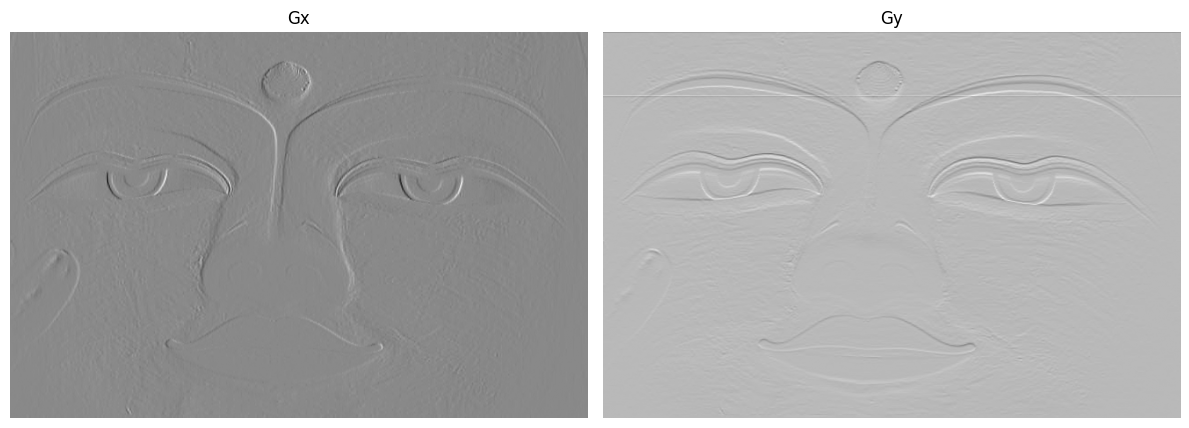

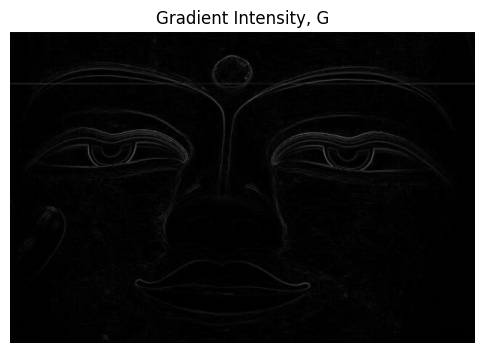

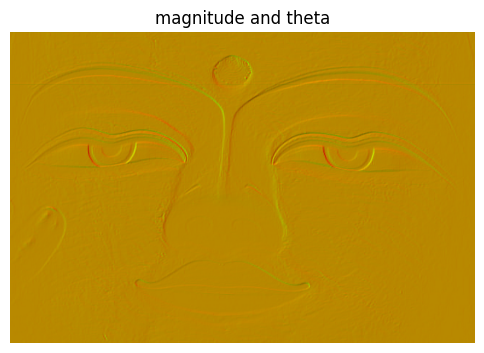

In [ ]:
#problem 2: apply sobel

face = cv.imread('face.jpg')
face = cv.cvtColor(face, cv.COLOR_BGR2RGB)

#  • Change the image to gray scale
gray_image = cv.cvtColor(face, cv.COLOR_BGR2GRAY) #gray scale

#  • Use the Sobel function to compute the gradient of the image in x direction, Gx, by
#  Calling the cv.Soble() function. Show Gx.
Gx = cv.Sobel(gray_image, cv.CV_64F, 1, 0, ksize=3) #Sobel function, x gradient
#  • Use the Sobel function to compute the gradient of the image in y direction, Gy, by
#  Calling the cv.Soble() function. Show Gy.
Gy = cv.Sobel(gray_image, cv.CV_64F, 0, 1, ksize=3) #Sobel function, y gradient


#  • Now that you found out both gradients in x and y direction, you can calculate gradient
#  strength and gradient orientation.
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('Gx')
plt.imshow(Gx, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Gy')
plt.imshow(Gy, cmap='gray')
plt.axis('off')
plt.tight_layout()

# Compute gradient intensity as:
#  G= sprt(g2x + g2y) then Plot G.
G = np.sqrt(Gx**2 + Gy**2)

plt.figure(figsize=(6, 6))
plt.title('Gradient Intensity, G')
plt.imshow(G, cmap='gray')
plt.axis('off')


#  • Compute gradient orientation as:
#  θ =tan−1 Gy/Gx
theta = np.arctan2(Gy, Gx) #gradient orientation

#  • Visualize magnitude and orientation together as a 3channel color image
# such that: Red channel = Gsinθ, Green channel = Gcosθ,Blue channel = 0,
red_channel = G * np.sin(theta)
green_channel = G * np.cos(theta)
blue_channel = np.zeros_like(G)

# Normalize channels to 0,255
red_channel = cv.normalize(red_channel, None, 0, 255, cv.NORM_MINMAX).astype(np.uint8)
green_channel = cv.normalize(green_channel, None, 0, 255, cv.NORM_MINMAX).astype(np.uint8)
blue_channel = cv.normalize(blue_channel, None, 0, 255, cv.NORM_MINMAX).astype(np.uint8)

color_image = cv.merge((red_channel, green_channel, blue_channel))

# Plot the resulted 3channel image.
plt.figure(figsize=(6, 6))
plt.title('magnitude and theta')
plt.imshow(color_image)
plt.axis('off')
plt.show()


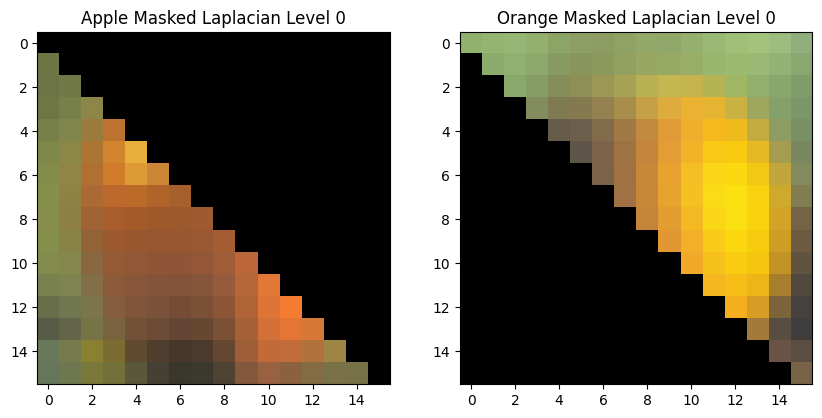

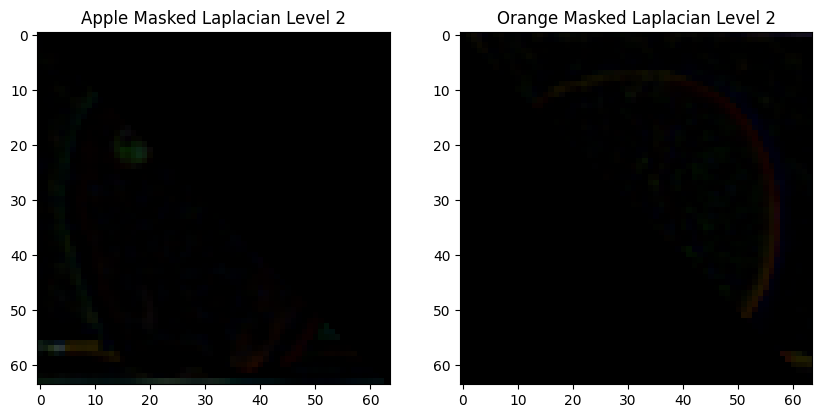

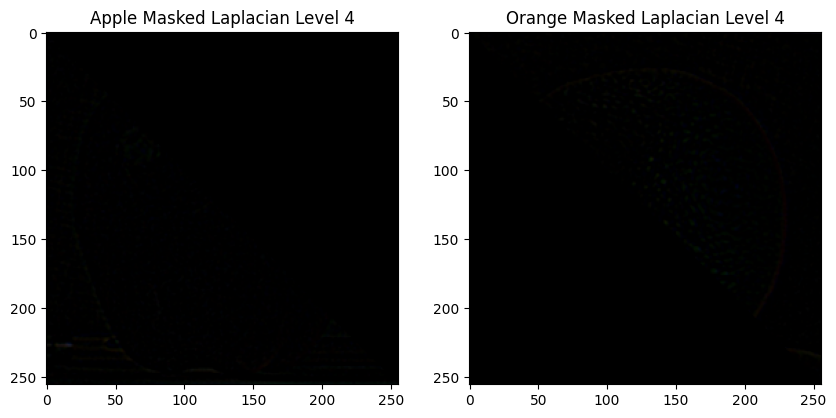

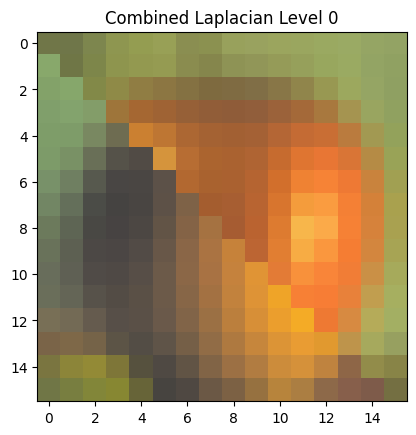

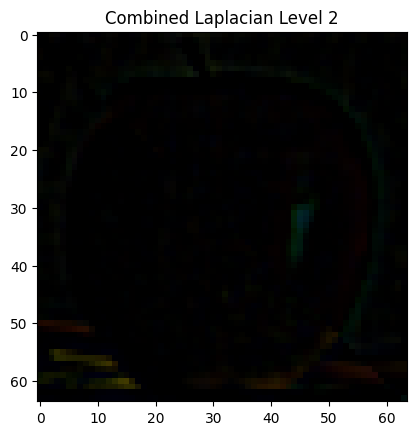

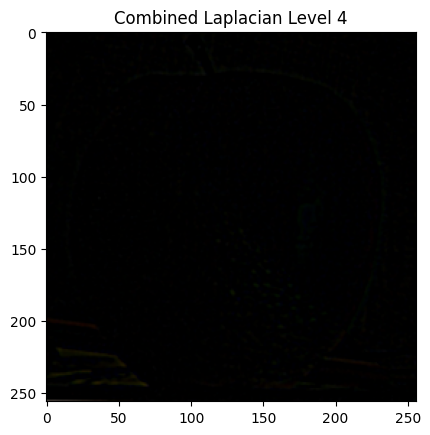

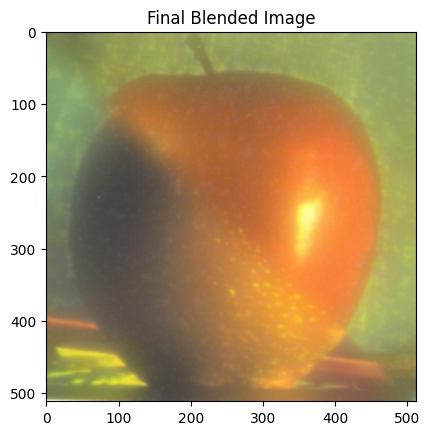

In [ ]:
apple = cv.imread('apple.jpg')
orange = cv.imread('orange.jpg')

#  • Smooth both image by using GaussianBlur function in cv, it is suggested to set value
#  of function as: ((5, 5)) for these images.
apple_blur = cv.GaussianBlur(apple, (5, 5), 0)
orange_blur = cv.GaussianBlur(orange, (5, 5), 0)

#  • generate Gaussian pyramid for apple in 6 levels (using a ”for” loop to call cv.pyrDown
#  function 6 times).
apple_gaussian_pyramid = [apple_blur.copy()]
for i in range(6):
    apple_blur = cv.pyrDown(apple_blur)
    apple_gaussian_pyramid.append(apple_blur)

#  • generate Gaussian pyramid for orange in 6 levels (using a ”for” loop to call cv.pyrDown
#  function 6 times)
orange_gaussian_pyramid = [orange_blur.copy()]
for i in range(6):
    orange_blur = cv.pyrDown(orange_blur)
    orange_gaussian_pyramid.append(orange_blur)

#  • generate Laplacian Pyramid for apple from the generated Gaussian pyramid ( using
#  a ”for” loop to call cv.pyrUp function 6 times)
apple_laplacian_pyramid = [apple_gaussian_pyramid[5]]
for i in range(5, 0, -1):
    gaussian_expanded = cv.pyrUp(apple_gaussian_pyramid[i])
    laplacian = cv.subtract(apple_gaussian_pyramid[i-1], gaussian_expanded)
    apple_laplacian_pyramid.append(laplacian)

#  • generate Laplacian Pyramid for orrang from the generated Gaussian pyramid (using
#  a ”for” loop to call cv.pyrUp function 6 times)
orange_laplacian_pyramid = [orange_gaussian_pyramid[5]]
for i in range(5, 0, -1):
    gaussian_expanded = cv.pyrUp(orange_gaussian_pyramid[i])
    laplacian = cv.subtract(orange_gaussian_pyramid[i-1], gaussian_expanded)
    orange_laplacian_pyramid.append(laplacian)

#  • form a combined Laplacian pyramid by adding up and down triangles of images in
#  each level. Plot the combined Laplacian in levels 0,2, and 4.
for i in [0, 2, 4]:
    mask = np.zeros_like(apple_laplacian_pyramid[i])
    rows, cols = mask.shape[:2]
    for r in range(rows):
        for c in range(cols):
            if r > c:
                mask[r, c] = 1

    apple_masked = cv.multiply(apple_laplacian_pyramid[i], mask)
    orange_masked = cv.multiply(orange_laplacian_pyramid[i], 1 - mask)

    # Plot the masked Laplacian of both apple and orange in levels 0, 2, and 4.
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(cv.cvtColor(apple_masked, cv.COLOR_BGR2RGB))
    axes[0].set_title(f'Apple Masked Laplacian Level {i}')
    axes[1].imshow(cv.cvtColor(orange_masked, cv.COLOR_BGR2RGB))
    axes[1].set_title(f'Orange Masked Laplacian Level {i}')
    plt.show()


combined_pyramid = []
for apple_lap, orange_lap in zip(apple_laplacian_pyramid, orange_laplacian_pyramid):
    rows, cols, dpt = apple_lap.shape
    laplacian_combined = np.zeros_like(apple_lap)
    for r in range(rows):
        for c in range(cols):
            if r > c:
                laplacian_combined[r, c] = orange_lap[r, c]  # Swap halves
            else:
                laplacian_combined[r, c] = apple_lap[r, c]  # Swap halves
    combined_pyramid.append(laplacian_combined)


for i in [0, 2, 4]:
    plt.imshow(cv.cvtColor(combined_pyramid[i], cv.COLOR_BGR2RGB))
    plt.title(f'Combined Laplacian Level {i}')
    plt.show()

#  • reconstruct the final image from the blended Laplacian pyramid (using a for loop to
#  call cv.pyrUp function 6 times). Plot the final image.
reconstructed_image = combined_pyramid[0]
for i in range(1, 6):
    reconstructed_image = cv.pyrUp(reconstructed_image)
    reconstructed_image = cv.add(reconstructed_image, combined_pyramid[i])

plt.imshow(cv.cvtColor(reconstructed_image, cv.COLOR_BGR2RGB))
plt.title('Final Blended Image')
plt.show()


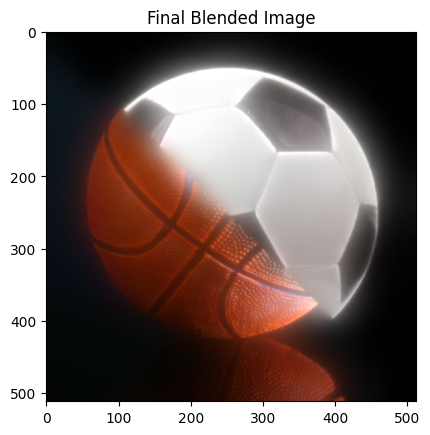

In [ ]:
#  Fun Part (Optional): For fun, chose two pictures you like and blend them the same
#  way. You can use any mask you like (10 points Bonus).
#  Once you finish implementing all the codes, please download your file. Please submit
#  your .ipynb file with the outputs (Please DO NOT clear the outputs).

soccer = cv.imread('soccer.png')
basket = cv.imread('basket.png')
#this is basically a copy and paste of the previous, using different images

apple_blur = cv.GaussianBlur(soccer, (5, 5), 0) #variable names are not accurate
orange_blur = cv.GaussianBlur(basket, (5, 5), 0)


apple_gaussian_pyramid = [apple_blur.copy()]
for i in range(6):
    apple_blur = cv.pyrDown(apple_blur)
    apple_gaussian_pyramid.append(apple_blur)


orange_gaussian_pyramid = [orange_blur.copy()]
for i in range(6):
    orange_blur = cv.pyrDown(orange_blur)
    orange_gaussian_pyramid.append(orange_blur)

apple_laplacian_pyramid = [apple_gaussian_pyramid[5]]
for i in range(5, 0, -1):
    gaussian_expanded = cv.pyrUp(apple_gaussian_pyramid[i])
    laplacian = cv.subtract(apple_gaussian_pyramid[i-1], gaussian_expanded)
    apple_laplacian_pyramid.append(laplacian)


orange_laplacian_pyramid = [orange_gaussian_pyramid[5]]
for i in range(5, 0, -1):
    gaussian_expanded = cv.pyrUp(orange_gaussian_pyramid[i])
    laplacian = cv.subtract(orange_gaussian_pyramid[i-1], gaussian_expanded)
    orange_laplacian_pyramid.append(laplacian)


for i in [0, 2, 4]:
    mask = np.zeros_like(apple_laplacian_pyramid[i])
    rows, cols = mask.shape[:2]
    for r in range(rows):
        for c in range(cols):
            if r > c:
                mask[r, c] = 1

    apple_masked = cv.multiply(apple_laplacian_pyramid[i], mask)
    orange_masked = cv.multiply(orange_laplacian_pyramid[i], 1 - mask)


combined_pyramid = []
for apple_lap, orange_lap in zip(apple_laplacian_pyramid, orange_laplacian_pyramid):
    rows, cols, dpt = apple_lap.shape
    laplacian_combined = np.zeros_like(apple_lap)
    for r in range(rows):
        for c in range(cols):
            if r > c:
                laplacian_combined[r, c] = orange_lap[r, c]  # Swap halves
            else:
                laplacian_combined[r, c] = apple_lap[r, c]  # Swap halves
    combined_pyramid.append(laplacian_combined)

reconstructed_image = combined_pyramid[0]
for i in range(1, 6):
    reconstructed_image = cv.pyrUp(reconstructed_image)
    reconstructed_image = cv.add(reconstructed_image, combined_pyramid[i])

plt.imshow(cv.cvtColor(reconstructed_image, cv.COLOR_BGR2RGB))
plt.title('Final Blended Image')
plt.show()


 Binary threshold In this assignment we work with the binary threshold and making mask
 to change the wallpaper.
 • Read first image ”balloons.png”
 • Convert the image to grayscale by using cvtColor function in cv.
 • Apply a binary threshold to isolate the balloon. HINT: You may need to adjust
 the threshold value like: (120, 255)
 • Invert the mask to get the balloon in white and the sky in black. Function bitwisenot
 may helpful for your development.
 • Convert the original image to grayscale (but keep 3 channels)
 • Use the mask to create a version of the original where the balloon keeps its color and
 the sky is grayscale.
 • Combine the color and grayscale portions, by using add function.
 • Plot the original and the preprocessed image.
 • Loadthesecond image (background.png) HINT: use function ”resize” to ensure
 the second image is the same size as the first image.
 • Isolate the balloon from the first image using the mask created earlier
 • Create a background from the second image by removing the area where the balloon
 will be placed.

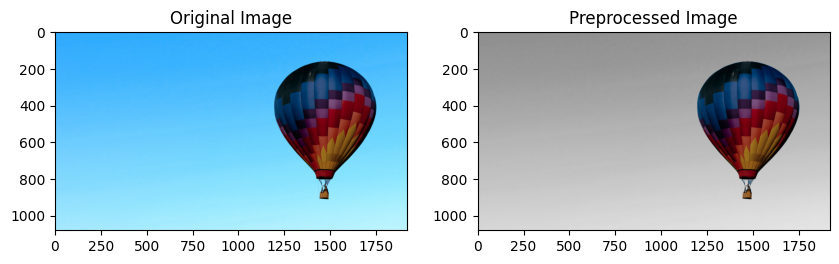

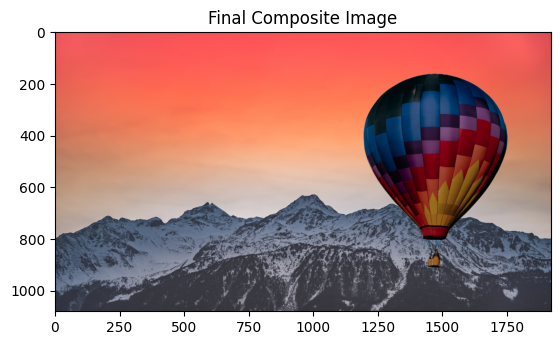

In [ ]:
#  • Convert the image to grayscale by using cvtColor function in cv.
balloons = cv.imread('balloons.png')

gray_image = cv.cvtColor(balloons, cv.COLOR_BGR2GRAY)

#  • Apply a binary threshold to isolate the balloon. HINT: You may need to adjust
#  the threshold value like: (120, 255)
_, threshold_image = cv.threshold(gray_image, 120, 255, cv.THRESH_BINARY)

#  • Invert the mask to get the balloon in white and the sky in black. Function
#bitwisenot may helpful for your development.
inverted_mask = cv.bitwise_not(threshold_image)

#  • Convert the original image to grayscale (but keep 3 channels)
gray_3_channel = cv.cvtColor(gray_image, cv.COLOR_GRAY2BGR)

#  • Use the mask to create a version of the original where the balloon keeps its color and
#  the sky is grayscale.
balloon_mask = cv.cvtColor(inverted_mask, cv.COLOR_GRAY2BGR)

#  • Combine the color and grayscale portions, by using add function.

color_balloon = cv.bitwise_and(balloons, balloon_mask)
gray_sky = cv.bitwise_and(gray_3_channel, cv.bitwise_not(balloon_mask))
final_image = cv.add(color_balloon, gray_sky)
#  • Plot the original and the preprocessed image.
# Plot the original and the preprocessed images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv.cvtColor(balloons, cv.COLOR_BGR2RGB))
plt.subplot(1, 2, 2)
plt.title('Preprocessed Image')
plt.imshow(cv.cvtColor(final_image, cv.COLOR_BGR2RGB))
plt.show()

#  • Loadthesecond image (background.png) HINT: use function ”resize” to ensure
#  the second image is the same size as the first image.
background = cv.imread('background.png')

# Resize the background image to match the first image
background_resized = cv.resize(background, (balloons.shape[1], balloons.shape[0]))

#  • Isolate the balloon from the first image using the mask created earlier
balloon_isolated = cv.bitwise_and(balloons, balloon_mask)

#  • Create a background from the second image by removing the area where the balloon
#  will be placed.
background_hole = cv.bitwise_and(background_resized, cv.bitwise_not(balloon_mask))

# Combine the isolated balloon with the new background
final_composite = cv.add(balloon_isolated, background_hole)

# Plot the final composite image
plt.figure()
plt.title('Final Composite Image')
plt.imshow(cv.cvtColor(final_composite, cv.COLOR_BGR2RGB))
plt.show()
